In [1]:
import torch
import matplotlib.pyplot as plt

from data_generator import get_test_data, get_train_data
from KCNODE import get_KCNODE_methanation_model

# Training and test data sets generation and normalization

In [2]:
tau_train, inputs_train, outputs_train = get_train_data()
tau_test, inputs_test, outputs_test = get_test_data()

# inputs = molar_flows: CO2, H2, CO, H2O, CH4, N2, independent_parameters:  Temperature, Pressure

inputs_train[:, -1] /= 30 # total pressure
inputs_train[:, -2] += 273.15 # temperature
inputs_train[:, -2] = 10000/8.31*(1/inputs_train[:, -2] - 1/(300+273.15)) # to 'Arrenius' temperature

inputs_train = torch.tensor(inputs_train, requires_grad=True).float()
outputs_train = torch.tensor(outputs_train, requires_grad=True).float()
tau_train = torch.tensor(tau_train, requires_grad=True).float()

inputs_test[:, -1] /= 30 
inputs_test[:, -2] += 273.15
inputs_test[:, -2] = 10000/8.31*(1/inputs_test[:, -2] - 1/(300+273.15))

inputs_test = torch.tensor(inputs_test, requires_grad=True).float()
outputs_test = torch.tensor(outputs_test, requires_grad=True).float()
tau_test = torch.tensor(tau_test, requires_grad=True).float()

# Building the kinetic-constrained neural ODE model and import trained parameters

In [4]:
PATH = r'trained_models\KCNODE_methanation.pt'
KCNODE = get_KCNODE_methanation_model()
KCNODE.load_state_dict(torch.load(PATH))

Your vector field callable (nn.Module) should have both time `t` and state `x` as arguments, we've wrapped it for you.


<All keys matched successfully>

# The generalization of the model

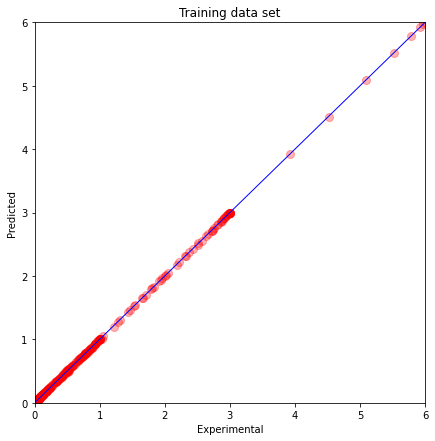

In [5]:
y_pred = KCNODE(inputs_train, tau_train)[:, :, :-3].detach().numpy().flatten()
y_exp = outputs_train[:, :, :-1].detach().numpy().flatten()


plt.figure(figsize=(7, 7))

plt.plot(y_exp, y_pred, 'ro', ms=8, alpha=0.3)
plt.plot([0, y_exp.max()], [0, y_exp.max()], 'b-', lw=1)

plt.title('Training data set')
plt.xlabel('Experimental')
plt.ylabel('Predicted')

plt.xlim(0, 6)
plt.ylim(0, 6)

plt.show()

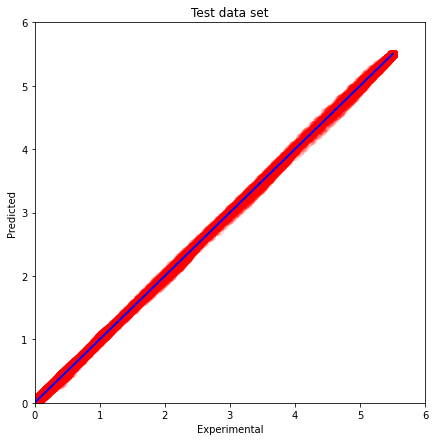

In [6]:
y_pred = KCNODE(inputs_test, tau_test)[:, :, :-3].detach().numpy().flatten()
y_exp = outputs_test[:, :, :-1].detach().numpy().flatten()

plt.figure(figsize=(7, 7))

plt.plot(y_exp, y_pred, 'ro', ms=8, alpha=0.1)
plt.plot([0, y_exp.max()], [0, y_exp.max()], 'b-', lw=2)

plt.title('Test data set')
plt.xlabel('Experimental')
plt.ylabel('Predicted')

plt.xlim(0, 6)
plt.ylim(0, 6)
plt.show()